In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weather_data.csv')
# collected almost 18 months of data in boulder
df.shape

(13104, 17)

In [3]:
df.head()

,Time,Temp_c,Wind_mph,Wind_degree,Wind_dir,Is_day,Condition,Precip_mm,Visib_miles,Humidity,Cloud,Feels_like_c,Dew_point_c,UV,Total_snow_cm,Chance_of_rain,Chance_of_snow
0,00:00,-7.0,5.6,259,W,0,Clear,0.0,0.0,6.0,77,0,-12.2,-10.3,-7.0,0,0
1,01:00,-6.7,5.6,255,WSW,0,Clear,0.0,0.0,6.0,75,0,-11.9,-10.3,-6.7,0,0
2,02:00,-6.4,5.8,248,WSW,0,Clear,0.0,0.0,6.0,73,0,-11.5,-10.5,-6.4,0,0
3,03:00,-5.4,5.6,250,WSW,0,Clear,0.0,0.0,6.0,64,0,-10.6,-11.1,-5.4,0,0
4,04:00,-5.0,5.6,252,WSW,0,Clear,0.0,0.0,6.0,63,0,-10.0,-10.8,-5.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13104 entries, 0 to 13103
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            13104 non-null  object 
 1   Temp_c          13104 non-null  float64
 2   Wind_mph        13104 non-null  float64
 3   Wind_degree     13104 non-null  int64  
 4   Wind_dir        13104 non-null  object 
 5   Is_day          13104 non-null  int64  
 6   Condition       13104 non-null  object 
 7   Precip_mm       13104 non-null  float64
 8   Visib_miles     13104 non-null  float64
 9   Humidity        13104 non-null  float64
 10  Cloud           13104 non-null  int64  
 11  Feels_like_c    13104 non-null  int64  
 12  Dew_point_c     13104 non-null  float64
 13  UV              13104 non-null  float64
 14  Total_snow_cm   13104 non-null  float64
 15  Chance_of_rain  13104 non-null  int64  
 16  Chance_of_snow  13104 non-null  int64  
dtypes: float64(8), int64(6), object

In [5]:
df.nunique()
# no.of unique values in each column

Time               24
Temp_c            300
Wind_mph          130
Wind_degree       361
Wind_dir           16
Is_day              2
Condition          32
Precip_mm          66
Visib_miles        48
Humidity            7
Cloud              78
Feels_like_c      101
Dew_point_c       376
UV                291
Total_snow_cm     300
Chance_of_rain     63
Chance_of_snow     72
dtype: int64

In [6]:
sum(df.duplicated())
# It's understandable to have these many duplicates because as it's hourly data, same values might be repeated.

8064

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape
# we still have 7 months of data - each day, hourly observations

(5040, 17)

In [9]:
df['Chance_of_snow'].value_counts()
# almost 70% of data has chance_of_snow values as zero

0     3637
79      46
68      43
75      42
82      41
      ... 
94       1
93       1
92       1
91       1
95       1
Name: Chance_of_snow, Length: 72, dtype: int64

In [10]:
df.isnull().sum()
# we don't have any null values

Time              0
Temp_c            0
Wind_mph          0
Wind_degree       0
Wind_dir          0
Is_day            0
Condition         0
Precip_mm         0
Visib_miles       0
Humidity          0
Cloud             0
Feels_like_c      0
Dew_point_c       0
UV                0
Total_snow_cm     0
Chance_of_rain    0
Chance_of_snow    0
dtype: int64

In [11]:
# just looking at the attributes 
df.iloc[0]

Time              00:00
Temp_c             -7.0
Wind_mph            5.6
Wind_degree         259
Wind_dir              W
Is_day                0
Condition         Clear
Precip_mm           0.0
Visib_miles         0.0
Humidity            6.0
Cloud                77
Feels_like_c          0
Dew_point_c       -12.2
UV                -10.3
Total_snow_cm      -7.0
Chance_of_rain        0
Chance_of_snow        0
Name: 0, dtype: object

## Observing categorical columns

In [12]:
# categorical columns
categoricals = list(df.select_dtypes(['object']).columns) 
categoricals

['Time', 'Wind_dir', 'Condition']

In [13]:
# by looking into the data attributes we can say that Is-day is also a cateogorical
categoricals.append('Is_day')
categoricals

['Time', 'Wind_dir', 'Condition', 'Is_day']

In [14]:
# looking at each of the categorical attribute
for each in categoricals:
    print('for', each, 'column - ') 
    print(df[each].value_counts()) 
    print('--------------------------')

for Time column - 
00:00    210
01:00    210
22:00    210
21:00    210
20:00    210
19:00    210
18:00    210
17:00    210
16:00    210
15:00    210
14:00    210
13:00    210
12:00    210
11:00    210
10:00    210
09:00    210
08:00    210
07:00    210
06:00    210
05:00    210
04:00    210
03:00    210
02:00    210
23:00    210
Name: Time, dtype: int64
--------------------------
for Wind_dir column - 
W      744
WSW    516
SW     399
NNE    318
WNW    317
SSW    313
ESE    291
NW     286
E      286
NE     262
N      258
NNW    236
SSE    210
SE     203
ENE    202
S      199
Name: Wind_dir, dtype: int64
--------------------------
for Condition column - 
Overcast                               847
Clear                                  808
Sunny                                  568
Partly cloudy                          540
Heavy snow                             490
Cloudy                                 327
Moderate snow                          264
Light snow                           

In [15]:
# 'Time' column doesn't make much sense as all of the values are uniformly distributed and also there are 24 different
# categories, it's not good to create 23 new columns as well. So, we are going to delete this column

df.drop('Time', axis = 1, inplace = True)
df.shape

(5040, 16)

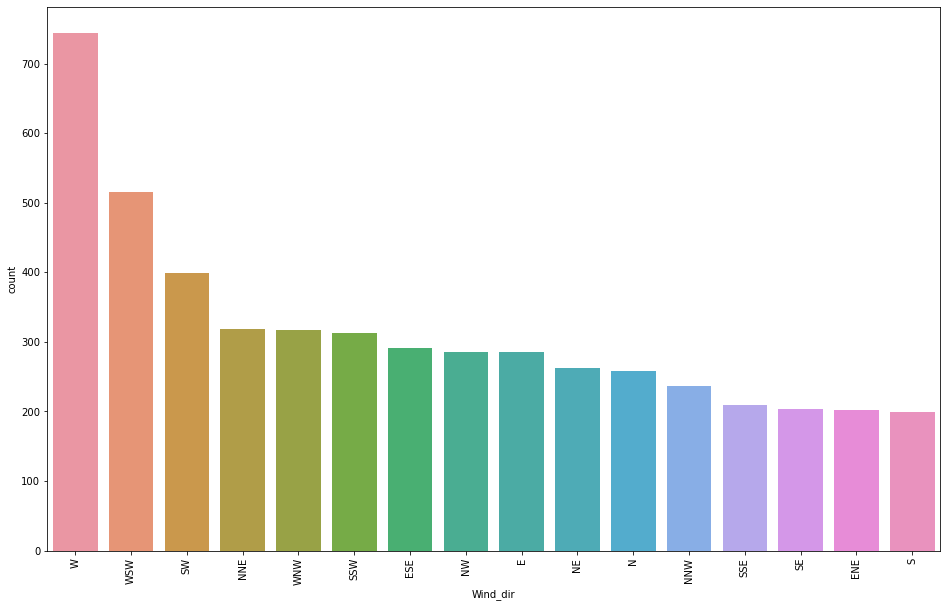

In [16]:
# For 'wind_dir' column

plt.figure(figsize = (16,10))
sns.countplot(data = df, x = df['Wind_dir'], order = df['Wind_dir'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [17]:
# we are having 16 categories in this column - having these mant isn't preferrable, better to convert them into 4 
# W, E, N, S - 4 directions

df['Wind_dir'] = df['Wind_dir'].apply(lambda x: x[0])
df['Wind_dir'].value_counts()

W    1577
N    1360
S    1324
E     779
Name: Wind_dir, dtype: int64

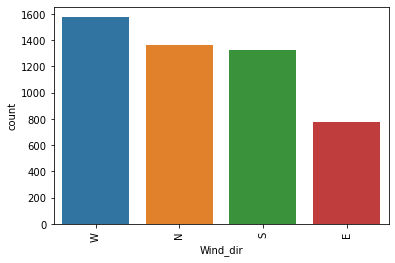

In [18]:
# wind_dir column after transformations

sns.countplot(data = df, x = df['Wind_dir'], order = df['Wind_dir'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [19]:
# now, we will create dummies for this wind_dir variable
dummies = pd.get_dummies(df['Wind_dir'], drop_first = True)
df = pd.concat([df.drop('Wind_dir', axis = 1), dummies], axis = 1)
df.shape

(5040, 18)

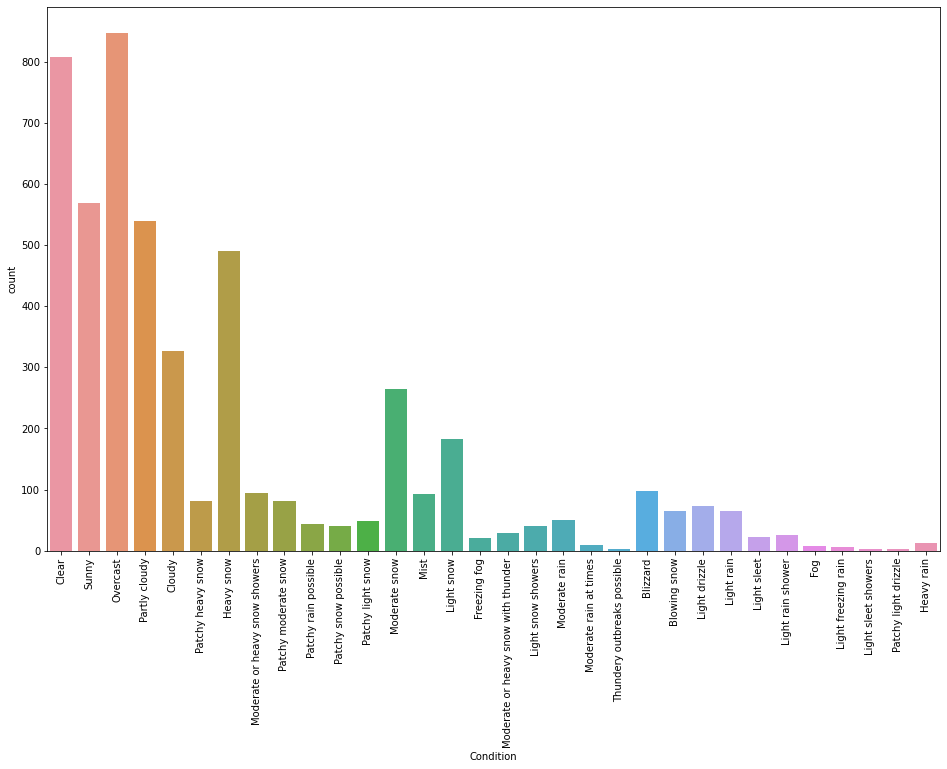

In [20]:
# For 'condition' column

plt.figure(figsize = (16,10))
sns.countplot(data = df, x = df['Condition'])
plt.xticks(rotation = 90)
plt.show()

In [21]:
# 'condition' column has 32 categories and around 15 categories have occurred in more than 100 rows, So having these
# many categories isn't good and also the 'condition' will be more or less covered by the remaining climatic values 
# along with 'cloud' column. So, we can delete this column
df.drop('Condition', axis = 1, inplace = True)
df.shape

(5040, 17)

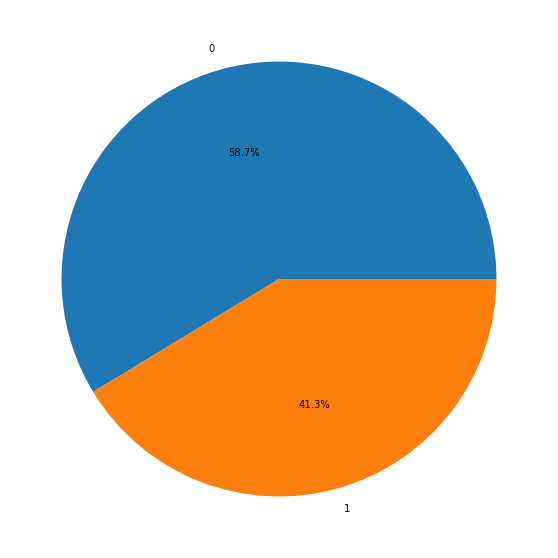

In [22]:
# plotting for 'Is_day' column

plt.figure(figsize = (16,10))
plt.pie(df['Is_day'].value_counts().values, labels = df['Is_day'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [23]:
# Is_day column, we will try to see if this has any realtion with target lable
df.groupby(by = 'Is_day')['Chance_of_snow'].mean()

Is_day
0    17.726842
1    17.934678
Name: Chance_of_snow, dtype: float64

In [24]:
# we can see that whether it's day or night, it's not having much of an impact on the snow - so, we will delete 
# this column as well
df.drop('Is_day', axis = 1, inplace = True)
df.shape

(5040, 16)

## Observing Numerical columns

In [25]:
numericals = [x for x in df.columns if x not in categoricals] 
numericals

['Temp_c',
 'Wind_mph',
 'Wind_degree',
 'Precip_mm',
 'Visib_miles',
 'Humidity',
 'Cloud',
 'Feels_like_c',
 'Dew_point_c',
 'UV',
 'Total_snow_cm',
 'Chance_of_rain',
 'Chance_of_snow',
 'N',
 'S',
 'W']

In [26]:
# updating the numericals
numericals.remove('N')
numericals.remove('S')
numericals.remove('W')
numericals

['Temp_c',
 'Wind_mph',
 'Wind_degree',
 'Precip_mm',
 'Visib_miles',
 'Humidity',
 'Cloud',
 'Feels_like_c',
 'Dew_point_c',
 'UV',
 'Total_snow_cm',
 'Chance_of_rain',
 'Chance_of_snow']

In [27]:
df[numericals].corr()
# finding correlations between columns

,Temp_c,Wind_mph,Wind_degree,Precip_mm,Visib_miles,Humidity,Cloud,Feels_like_c,Dew_point_c,UV,Total_snow_cm,Chance_of_rain,Chance_of_snow
Temp_c,1.000000,0.123029,-0.012667,0.156219,-0.067398,0.077167,-0.142863,-0.016715,0.950379,0.807330,1.000000,0.379728,-0.128745
Wind_mph,0.123029,1.000000,0.308688,0.118403,-0.102242,-0.175280,-0.065457,0.190910,-0.160623,0.106888,0.123029,0.273279,-0.104067
Wind_degree,-0.012667,0.308688,1.000000,-0.049593,-0.122376,-0.003528,-0.159557,-0.040115,-0.118563,-0.090396,-0.012667,0.068325,-0.109774
Precip_mm,0.156219,0.118403,-0.049593,1.000000,0.438514,-0.314920,0.280035,0.248939,0.129796,0.297303,0.156219,0.414938,0.230771
Visib_miles,-0.067398,-0.102242,-0.122376,0.438514,1.000000,-0.310470,0.322992,0.225501,-0.018750,0.113775,-0.067398,0.013431,0.431591
Humidity,0.077167,-0.175280,-0.003528,-0.314920,-0.310470,1.000000,-0.468558,-0.521275,0.099538,-0.190875,0.077167,-0.165405,-0.609253
Cloud,-0.142863,-0.065457,-0.159557,0.280035,0.322992,-0.468558,1.000000,0.638181,-0.082921,0.459291,-0.142863,0.228642,0.418183
Feels_like_c,-0.016715,0.190910,-0.040115,0.248939,0.225501,-0.521275,0.638181,1.000000,-0.041336,0.358708,-0.016715,0.256069,0.436347
Dew_point_c,0.950379,-0.160623,-0.118563,0.129796,-0.018750,0.099538,-0.082921,-0.041336,1.000000,0.785852,0.950379,0.312926,-0.072004
UV,0.807330,0.106888,-0.090396,0.297303,0.113775,-0.190875,0.459291,0.358708,0.785852,1.000000,0.807330,0.477131,0.112209


In [28]:
df[numericals].describe()
# looking at the statistical measures  of each column

,Temp_c,Wind_mph,Wind_degree,Precip_mm,Visib_miles,Humidity,Cloud,Feels_like_c,Dew_point_c,UV,Total_snow_cm,Chance_of_rain,Chance_of_snow
count,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000
mean,-2.643492,9.217341,193.527778,0.234881,1.037238,4.584722,75.077976,62.382540,-7.128889,-6.816369,-2.643492,6.083532,17.812698
std,5.347029,5.600060,100.571508,0.716096,2.117256,2.034034,16.839178,38.582007,6.699129,5.667752,5.347029,19.263106,30.478323
min,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,-30.800000,-22.000000,-20.000000,0.000000,0.000000
25%,-5.700000,4.900000,104.000000,0.000000,0.000000,3.000000,64.000000,20.000000,-10.500000,-10.500000,-5.700000,0.000000,0.000000
50%,-1.900000,8.300000,220.000000,0.000000,0.090000,6.000000,77.000000,78.000000,-6.100000,-6.100000,-1.900000,0.000000,0.000000
75%,0.800000,12.300000,272.000000,0.100000,1.360000,6.000000,90.000000,100.000000,-2.800000,-2.800000,0.800000,0.000000,27.000000
max,12.300000,30.200000,360.000000,10.200000,18.790000,6.000000,99.000000,100.000000,12.400000,8.300000,12.300000,89.000000,99.000000


In [29]:
# checking for outliers
for each in numericals:
    print(each, np.abs(df[each].skew()))
    
# precipitation, visibility in miles, Chance_of_rain have a fair bit of outliers that should be definitely handled

Temp_c 0.45429195804910455
Wind_mph 0.8698414472572658
Wind_degree 0.3574581468540831
Precip_mm 6.225353597460663
Visib_miles 4.54978288824567
Humidity 1.0504097127381904
Cloud 0.6452336117951147
Feels_like_c 0.496546647778523
Dew_point_c 0.6779593195992186
UV 0.2677712174527687
Total_snow_cm 0.45429195804910455
Chance_of_rain 3.0510529795361014
Chance_of_snow 1.2789942047244913


<AxesSubplot:>

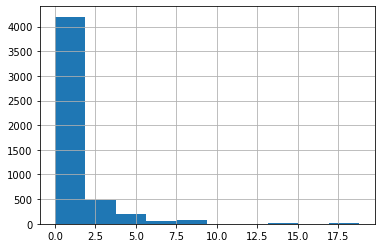

In [30]:
df['Visib_miles'].hist()
## almost 50% of the data values have visible miles as 0 which doesn't make any sense

In [31]:
print(len(df[df['Visib_miles']<=1]))
df[df['Visib_miles']<=1]['Chance_of_snow'].value_counts().head()

# out of 2232 observations where there was no visibility there was no snow in 2142 observaions - so, visibility of 
# zero is more or less no chance of snow

3552


0     3033
21      24
79      17
26      14
63      14
Name: Chance_of_snow, dtype: int64

In [32]:
print(len(df[df['Visib_miles']>4]))
df[df['Visib_miles']>4]['Chance_of_snow'].value_counts().head()

# out of 2808 observations where there was some visibility distance, 50% observations had 

288


0     73
77     9
84     8
83     8
70     8
Name: Chance_of_snow, dtype: int64

In [33]:
# It's better to discretize the columns into three bins of values <1, 1-4, >4
df['Visib_miles_bin'] = pd.cut(df['Visib_miles'], bins=[-0.1, 1, 4, 20], 
                          labels=[1,2,3])

In [34]:
df['Visib_miles_bin'].value_counts()

1    3552
2    1200
3     288
Name: Visib_miles_bin, dtype: int64

In [35]:
df[['Precip_mm','Chance_of_snow']].corr()
# resonable correlation, so don't delete this column

,Precip_mm,Chance_of_snow
Precip_mm,1.000000,0.230771
Chance_of_snow,0.230771,1.000000


<AxesSubplot:>

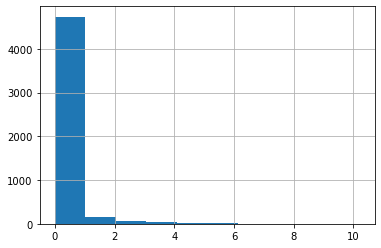

In [36]:
df['Precip_mm'].hist()

In [37]:
print(len(df[df['Precip_mm']==0]))
df[df['Precip_mm']==0]['Chance_of_snow'].value_counts().head()

3277


0     3200
21      14
27      11
26       9
28       9
Name: Chance_of_snow, dtype: int64

In [38]:
print(len(df[df['Precip_mm']>2]))
df[df['Precip_mm']>2]['Chance_of_snow'].value_counts().head()

143


0     82
68     6
70     4
69     4
65     3
Name: Chance_of_snow, dtype: int64

In [39]:
## we can observe that 0, 0-2, >2 seems to be best values to discretize
df['Precip_mm'] = pd.cut(df['Precip_mm'], bins=[-0.01, 0.01, 2, 10], 
                          labels=[1,2,3])

In [40]:
df['Precip_mm'].value_counts()

1    3277
2    1620
3     142
Name: Precip_mm, dtype: int64

### Looking at the chance_of_rain column

Text(0.5, 1.0, 'Distribution of Chance_of_rain values')

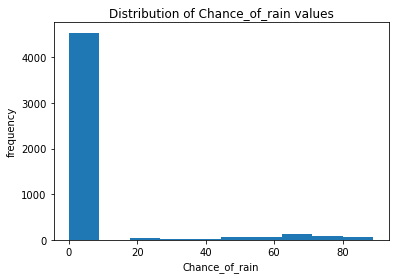

In [68]:
plt.hist(df['Chance_of_rain'])
plt.xlabel('Chance_of_rain')
plt.ylabel('frequency')
plt.title('Distribution of Chance_of_rain values')

In [42]:
# I am creating a new column to represent whether it will rain or not which will only have 2 categories
# as it's difficult to use or either transform Chance_of_rain because too many values are at 0(almost 90%)

df['rain_or_not'] = np.where(df['Chance_of_rain'] == 0, 0, 1)

#### No more outliers

## Scatter plots of variables 

[Text(0.5, 1.0, 'Temperature vs Dew point')]

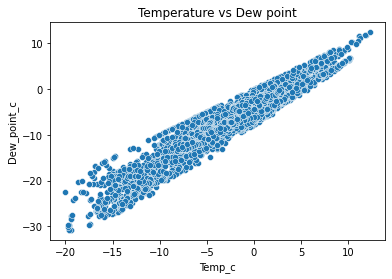

In [71]:
sns.scatterplot(x = 'Temp_c', y = 'Dew_point_c', data = df).set(title='Temperature vs Dew point')

# More temperatures leads to higher Dew point values

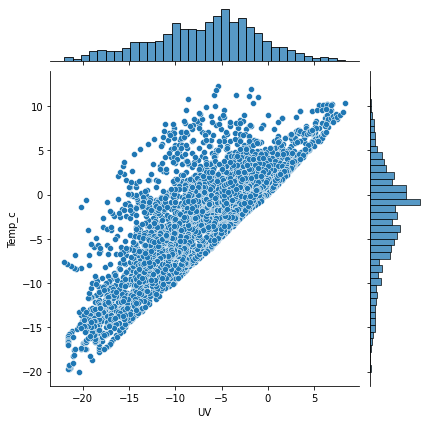

In [75]:
sns.jointplot(x = 'UV', y = 'Temp_c', data = df)

# more UV rays in the climate refers to higher temperatures and both the Temp_c and UV column are normally distributed

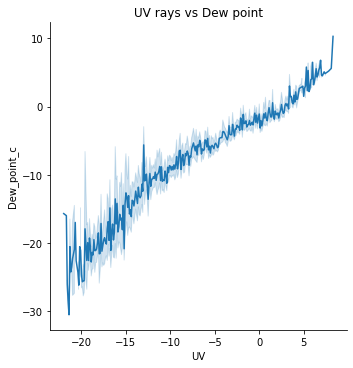

In [76]:
sns.relplot(data = df, x = 'UV', y = 'Dew_point_c', kind = 'line').set(title='UV rays vs Dew point')

# Higher UV values tends to Higher Dew point values

### After looking at the above three graphs we can say that Temperature, UV rays and dew point values are strongly related with each other

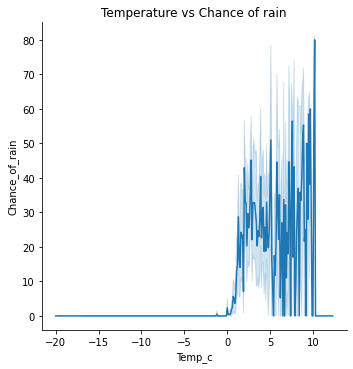

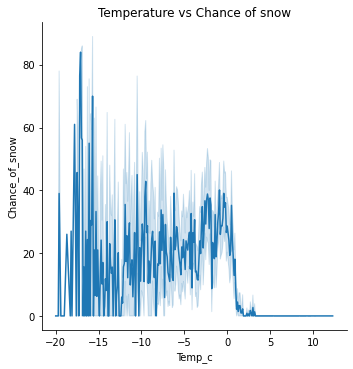

In [77]:
sns.relplot(data = df, x = 'Temp_c', y = 'Chance_of_rain', kind = 'line').set(title='Temperature vs Chance of rain')
sns.relplot(data = df, x = 'Temp_c', y = 'Chance_of_snow', kind = 'line').set(title='Temperature vs Chance of snow')
# rain more often than not occurs in between 0 and 10 temperatures

## we can see from the above two graphs that temperatures below 0 degrees celsius leads to snow and above that till 10 degrees leads to more of rain

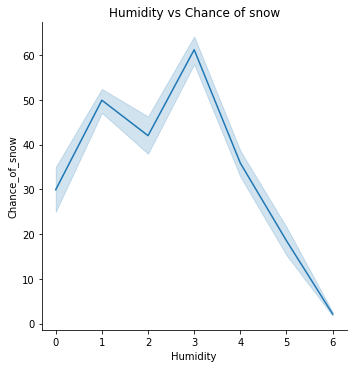

In [78]:
sns.relplot(data = df, x = 'Humidity', y = 'Chance_of_snow', kind = 'line').set(title='Humidity vs Chance of snow')

# lower Humidity values leads to more chance of snow fall

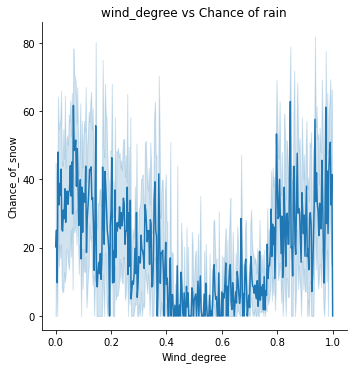

In [83]:
sns.relplot(data = df, x = 'Wind_degree', y = 'Chance_of_snow', kind = 'line').set(title='wind_degree vs Chance of rain')

# lesser wind_degree leads to more chance of snow

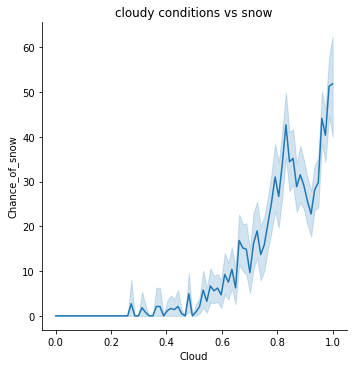

In [84]:
sns.relplot(data = df, x = 'Cloud', y = 'Chance_of_snow', kind = 'line').set(title='cloudy conditions vs snow')

# Clear representation which shows higher cloud values leads to high chance of snow

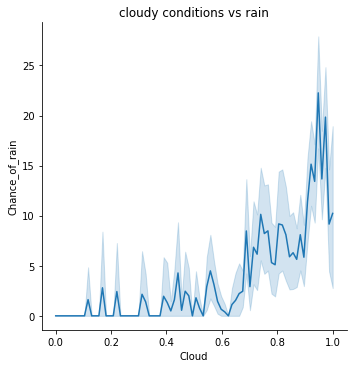

In [86]:
sns.relplot(data = df, x = 'Cloud', y = 'Chance_of_rain', kind = 'line').set(title='cloudy conditions vs rain')

# This graph is opposite to the above graph which on the whole says --> more cloudy conditions leads to higher chances
# of snow but it doesn't mean large amount of snow fall will happen.

## relationship of attributes with target label

<AxesSubplot:>

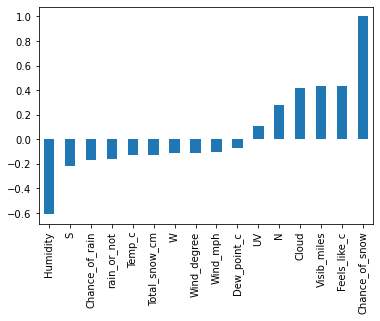

In [51]:
# which attributes are mostly related to our targer column - 'Chance_of_snow'?
df.corr()['Chance_of_snow'].sort_values().plot(kind = 'bar')

## Humidity, visib_miles, Feels_like_c, Clous, Precip_mm, N, S columns seems to be having some sort of impact on 
# the target label.

<AxesSubplot:xlabel='Humidity', ylabel='Chance_of_snow'>

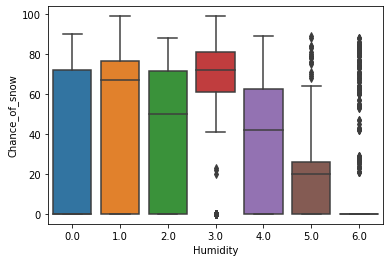

In [52]:
sns.boxplot(x = 'Humidity', y = 'Chance_of_snow',data =df).set(title='Humidity vs chance of snow')
# not exact relation but lower humidity values leads to slightly better chances of snow

[Text(0.5, 1.0, 'Rain vs snow')]

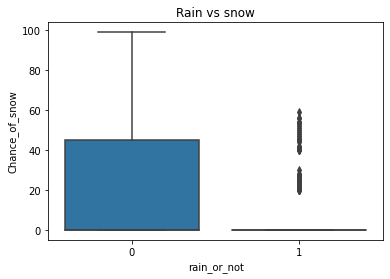

In [87]:
sns.boxplot(x = 'rain_or_not', y = 'Chance_of_snow',data =df).set(title='Rain vs snow')
# having a climate which has better chances of rain has a tendency of having snow fall as well

## Normalizations

In [54]:
df.head()

,Temp_c,Wind_mph,Wind_degree,Precip_mm,Visib_miles,Humidity,Cloud,Feels_like_c,Dew_point_c,UV,Total_snow_cm,Chance_of_rain,Chance_of_snow,N,S,W,Visib_miles_bin,rain_or_not
0,-7.0,5.6,259,1,0.0,6.0,77,0,-12.2,-10.3,-7.0,0,0,0,0,1,1,0
1,-6.7,5.6,255,1,0.0,6.0,75,0,-11.9,-10.3,-6.7,0,0,0,0,1,1,0
2,-6.4,5.8,248,1,0.0,6.0,73,0,-11.5,-10.5,-6.4,0,0,0,0,1,1,0
3,-5.4,5.6,250,1,0.0,6.0,64,0,-10.6,-11.1,-5.4,0,0,0,0,1,1,0
4,-5.0,5.6,252,1,0.0,6.0,63,0,-10.0,-10.8,-5.0,0,0,0,0,1,1,0


In [56]:
# wind degree values and Cloud values are in higher scale compared to other attributes - will use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
df[["Cloud"]] = MinMaxScaler().fit_transform(df[['Cloud']])

In [58]:
df[["Wind_degree"]] = MinMaxScaler().fit_transform(df[['Wind_degree']])

In [73]:
df.head()

,Temp_c,Wind_mph,Wind_degree,Precip_mm,Visib_miles,Humidity,Cloud,Feels_like_c,Dew_point_c,UV,Total_snow_cm,Chance_of_rain,Chance_of_snow,N,S,W,Visib_miles_bin,rain_or_not
0,-7.0,5.6,0.719444,1,0.0,6.0,0.714286,0,-12.2,-10.3,-7.0,0,0,0,0,1,1,0
1,-6.7,5.6,0.708333,1,0.0,6.0,0.688312,0,-11.9,-10.3,-6.7,0,0,0,0,1,1,0
2,-6.4,5.8,0.688889,1,0.0,6.0,0.662338,0,-11.5,-10.5,-6.4,0,0,0,0,1,1,0
3,-5.4,5.6,0.694444,1,0.0,6.0,0.545455,0,-10.6,-11.1,-5.4,0,0,0,0,1,1,0
4,-5.0,5.6,0.700000,1,0.0,6.0,0.532468,0,-10.0,-10.8,-5.0,0,0,0,0,1,1,0
